_Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 A. D. Lentner_

# The China Syndrome

Welcome to my Fall 2015 project for the George Washington University, School of Mechanical and Aeronautical Engineering, Numerical Methods course.  The lesson presented in this notebook, _The China Syndrome: One Dimensional, multi-region, Heat conduction with non-linear Neumann Boundary Conditions and volumetric source_, is of significant personal interest. Before we begin I would like to acknowlage Professor L. Barba and the great Jupyter notebooks that have been presented in this course, and upon which I draw stylistic, layout, and presentational inspiration for my lesson herein _(and darn it all if I haven't grown to enjoy python!!!!)_.

The heat conduction equation

\begin{equation}
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2} + \frac{\dot{ q_{v}}}{\rho C_{p}}
\end{equation}

where $\alpha$ is the thermal diffusivity, $T$ is the temperature, and $\dot{ q_{v}}$ is the volumetric heat generation.

In this lesson, we will be applying non-linear Neumann boundary conditions to the heat conduction equation.  That is, boundary conditions which are non-constant, depend on the value of the function (i.e., surface temperature), and in fact, do so _non-linearly_.  This has several important implications, which we will dive into more deeply a bit latter into the lesson. Most importantly, it means that we will need to iterate to find the solution at each and every time step.  Specifically, the boundary conditions we will be studying are the following:

$$\frac{\partial T}{\partial x}\left.\begin{matrix} \end{matrix}\right|_{x = 0} = h_{rad}\left ( T\left.\begin{matrix} \end{matrix}\right|_{x = 0} \right ) \left ( T\left.\begin{matrix} \end{matrix}\right|_{x = 0} - T_{inf} \right )$$
$$\frac{\partial T}{\partial x}\left.\begin{matrix} \end{matrix}\right|_{x = x_{1} + x_{2}} = h_{conv}\left ( T\left.\begin{matrix} \end{matrix}\right|_{x = x_{1} +. x_{2}} \right ) \left ( T\left.\begin{matrix} \end{matrix}\right|_{x = x_{1}+x_{2}} - T_{inf} \right )$$

 With the initial conditions
 $$T\left.\begin{matrix} \end{matrix}\right|_{t = 0} = T_{0}$$

And interface conditions
$$\dot{q''}_{left} = \dot{q''}_{right} $$ 

##### _Now for a little background_

The nuclear reactor accident and simultaneous meltdown of three of the five nuclear reactors at the Fukushima Daiichi nuclear power station in spring of 2011 was the most severe nuclear disaster since the Chernobyl unit 4 explosion in 1986 and the Three Mile Island Unit 2 partial meltdown in 1979.  The nuclear accident at Fukushima Daiichi has spawned significant investment in experimental and analytical research programs, as was the case following the Three Mile Island accident, to increase understanding in severe accident phenomenology and predictive capabilities of severe accident thermal hydraulic system codes (e.g., MELCOR, MAAP, ATHLET, and RELAP5-SCDAP).  These research efforts provide important information in the development and refinement of Severe Accident Management (SAM) strategies such as External Reactor Vessel Cooling (ERVC) to prevent reactor vessel failure.  Retention of the molten reactor core within the reactor vessel is one of the most powerful SAM strategies and has gained particular attention following the Fukushima Daiichi accident and the nuclear industries investment in FLEX (Home & Chai, 2015).  In-vessel retention limits the consequences of a beyond design basis nuclear reactor accident by precluding exotic ex-vessel phenomena which can challenge containment integrity and cause a significant release of hazardous radioactivity to the environment; such as, Molten Core Concrete Interactions (MCCIs), Fuel Coolant Interaction (FCI), and Direct Containment Heating (DCH).

In-Vessel retention using ERVC is a SAM strategy in which the cavity inside of the containment structure and external to the reactor vessel is flooded to provide a cooling mechanism to the reactor vessel lower head in order to remove the thermal load provided by the relocated molten corium mass on the inside surface of the reactor vessel lower plenum.  This strategy relies on the ability of the submerged reactor vessel lower head to maintain a sufficiently low downward or lateral facing heat flux as to preclude the occurrence of Critical Heat Flux (CFH), resultant temperature excursion, and subsequent loss of reactor vessel integrity through either a creep rupture, melting, or rapid eutectic dissolution failure mechanism. Thus it is necessary to predict the transient temperature distrobution in such a configuration.

##### _Your mission, should you choose to accept it (this is a bonus lesson after all ... but I think you're up to it)_

To serve as a simplified introduction into the simulation of the severe thermal hydraulic phenomena involved in the meltdown of a nuclear reactor we are going to investigate a simplified version of ERVC following a severe reactor accident.  Specifically, we are going to predict the transient temperature distrobution of a stagnent molten metal pool dropped onto a relatively thin metal plate cooled by liquid water from below contained within an isothermal vacuum chamber.  Figure 1 below details the geometry of the problem to be simulated.  As introduced by professor L. Barba in Lesson 2 of Module 4, we will be using an implicit cental difference in space, forward in time scheme.  One important difference is the need to iteratively solve for the solution at each timestep as the boundary conditions are also dependant on the solution.  We will be applying a Newton-Raphson scheme to resolve this non-linearity.


![Problem_Diagram](./figures/Problem_Diagram.png)
                                _Figure 1. Diagram of problem description to be modeled_.




##### _Newton-Raphson Scheme_

As presented in [_"Newton's Method!"_](https://en.wikipedia.org/wiki/Newton%27s_method), Newton's method, or Newton-Raphson scheme, is found by setting the tangent line of a function (a system of equations for our interest) equal to zero and solving for the root $x_{n+1}$.  Newton's method necessitates that the exact or approxamate derivative of the function (or system of equations) be determined at every point for which the solution is desired. Depending on the governing equation, it may be difficult or computationally impractical to assertain an analytical or approximate expression of the derivative.  However, this will not be an issue for our interests.  Newton's method is presented as follows:

$$y\left ( x \right ) = f'\left ( x_{n} \right )\left ( x-x_{n} \right ) + f\left ( x_{n} \right )$$

$$0 = f'\left ( x_{n} \right )\left ( x_{n+1}-x_{n} \right ) +f\left ( x_{n} \right )$$

$$x_{n+1} = x_{n} - \frac{f\left ( x_{n} \right )}{f'\left ( x_{n} \right )}$$

This result is then extened to a system of differencial equations, as the following:

$$\underline{X}_{n+1} = \underline{X}_{n} - \underline{\underline{J}}^{-1}.\underline{F}\left (\underline{X}_{n}\right )$$

$$\underline{X}_{n+1} = \underline{X}_{n} - \underline{\underline{J}}^{-1}.\left (\underline{\underline{A}}. \underline{X}_{n} - \underline{B}\right )$$

Where $A$ & $B$ are the coefficient and inhomogenious matricies respectively, and $J$ is the Jacobian Matrix defined by 

$$\underline{\underline{J}} = \begin{bmatrix}
\frac{\partial f_{1}}{\partial x_{1}} & \frac{\partial f_{1}}{\partial x_{2}} & \cdots  & \frac{\partial f_{1}}{\partial x_{n}}\\
\frac{\partial f_{2}}{\partial x_{1}} & \frac{\partial f_{2}}{\partial x_{2}} & \cdots  & \frac{\partial f_{2}}{\partial x_{n}}\\
\vdots  &  &  & \\
\frac{\partial f_{n}}{\partial x_{1}} & \frac{\partial f_{n}}{\partial x_{2}} & \cdots  & \frac{\partial f_{n}}{\partial x_{n}}\\
\end{bmatrix}$$

##### _Finite Difference Equations (implicit Central Space Forward Time)_

Now we will proceed to develop the finite difference equations for the governing equation and geometry presented above.  As expected we will need to develop 6 distinct sets of equations; one each for the upper and lower boundary nodes, one each for the interior nodes for each material, and finally one each for the interface nodes for each material.

Lets start with the interior node for the upper region (i.e., the heat producing material with a radiative upper boundary).  You should grab some paper (don't remember what that is ... its that dead tree stuff with lines) and follow the derivation yourself as they get more difficult as we proceed.

$$\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2} + \frac{\dot{ q_{v}}}{\rho C_{p}}$$

$$\frac{T^{n+1}_{i} - T^{n}_{i}}{\Delta t} = \alpha \frac{T^{n+1}_{i+1} -2 T^{n+1}_{i} + T^{n+1}_{i-1}}{\Delta x^2} + \frac{\dot{ q}^{n+1}_{i}}{\rho C_{p}}$$

$$\left ( 1 + 2 Fo\right ) T^{n+1}_{i} - Fo \left ( T^{n+1}_{i+1} + T^{n+1}_{i-1} \right ) = T^{n}_{i} + \frac{\Delta t}{\rho C_{p}}\dot{ q}^{n+1}_{i}$$


Where the Fourier Number $Fo$ is defined as $\frac{\alpha \Delta t}{\Delta x^{2}}$




Lets move on with the upper boundary node for the upper region (i.e., radiative upper boundary).  You should grab some paper (yes I said it again ... not sure you were listening last time) and follow the derivation yourself.

First recall that the stephan-boltzman radiation law can be cleverly writen in a form similar to Newton's Law of cooling with the convective coeficient $h$ a fuction of surface and bulk temperatures. 

$$ q" \left ( x \right ) |_{x = L_{up}} = \sigma \epsilon \left (T_{sur}^{4} - T_{inf}^{4} \right)  $$

$$ q" \left ( x \right ) |_{x = L_{up}} = \sigma \epsilon \left (T_{sur} + T_{inf} \right) \left(T_{sur}^{2} + T_{inf}^{2} \right) \left(T_{sur} - T_{inf} \right)$$

$$ q" \left ( x \right ) |_{x = L_{up}} = h_{rad}\left(T_{suf}\right) \left (T_{sur} - T_{inf} \right)  $$

Now that we have that out of the way, on to the finite difference equation for the upper boundary node.  This one is a bit trickier, so lets start from the governing energy conservation equation and see what we get. _note all terms assume heat entering the node_

$$\dot{E}_{storage} = \dot{E}_{net-inflow} + \dot{E}_{generation}$$

$$\rho C_{p} A \frac{\Delta x}{2} \frac{T^{n+1}_{i} - T^{n}_{i}}{\Delta t} = hA\left(T_{inf} - T^{n+1}_{i}\right) + \frac{kA}{\Delta x}\left(T^{n+1}_{i+1} - T^{n+1}_{i} \right) + A\frac{\Delta x}{2} \dot{q}^{n+1}_{i}$$

$$\left ( 1 + 2 Fo\left(1+Bi\right)\right ) T^{n+1}_{i} - 2 Fo T^{n+1}_{i+1} = T^{n}_{i} + 2 Fo Bi T_{inf} + \frac{\Delta t}{\rho C_{p}}\dot{ q}^{n+1}_{i}$$

Where the Biot Number $Bi$ is defined as $\frac{h \Delta x}{k}$



Finally, let's move on to the lower interface boundary node for the upper region.  You should grab some paper (yes I keep saying it ... I had to do it twice because of a sign error which resulted in several python errors) and follow the derivation yourself.  Again, lets start from the governing energy conservation equation and see what we get. _note all terms assume heat entering the node with the upper node as 1 and lower node as 2_

$$\dot{E}_{storage} = \dot{E}_{net-inflow} + \dot{E}_{generation}$$

$$\rho C_{p} A \Delta x_{1} \frac{T^{n+1}_{i} - T^{n}_{i}}{\Delta t} = \frac{k_{1} A}{\Delta x_{1}}\left(T^{n+1}_{i-1} - T^{n+1}_{i} \right) + \frac{k_{2} A}{\Delta x_{2}}\left(T^{n+1}_{i+1} - T^{n+1}_{i} \right) + A\Delta x_{1} \dot{q}^{n+1}_{i}$$

$$ \left( 1 + \frac{\Delta t}{\rho C_{p 1}} \left(\frac{k_{1}}{\Delta x^{2}_{1}} + \frac{k_{2}}{\Delta x_{1} \Delta x_{2}}\right)\right)T^{n+1}_{i} + \frac{\Delta t}{\rho C_{p 1}} \left(\frac{k_{1}}{\Delta x^{2}_{1}}T^{n+1}_{i-1} + \frac{k_{2}}{\Delta x_{1} \Delta x_{2}}T^{n+1}_{i+1}\right) = T^{n}_{i} + \frac{\Delta t}{\rho C_{p 1}}\dot{ q}^{n+1}_{i}$$

$$\left ( 1 + Fo_{1}\left(1+\frac{k_{2}\Delta x_{1}}{k_{1}\Delta x_{2}}\right)\right ) T^{n+1}_{i} - Fo_{1} \left( T^{n+1}_{i-1} + \frac{k_{2}\Delta x_{1}}{k_{1}\Delta x_{2}} T^{n+1}_{i+1} \right) = T^{n}_{i} + \frac{\Delta t}{\rho C_{p}}\dot{ q}^{n+1}_{i}$$


Now the analogious nodes for the lower region (i.e., without heat generation and a convective lower boundary) can be obtained by inspection and are as follows:

$$\left ( 1 + 2 Fo\right ) T^{n+1}_{i} - Fo \left ( T^{n+1}_{i+1} + T^{n+1}_{i-1} \right ) = T^{n}_{i} $$  

$$\left ( 1 + 2 Fo\left(1+Bi\right)\right ) T^{n+1}_{i} - 2 Fo T^{n+1}_{i-1} = T^{n}_{i} + 2 Fo Bi T_{inf} $$

$$\left ( 1 + Fo_{2}\left(1+\frac{k_{1}\Delta x_{2}}{k_{2}\Delta x_{1}}\right)\right ) T^{n+1}_{i} - Fo_{2} \left( T^{n+1}_{i+1} + \frac{k_{1}\Delta x_{2}}{k_{2}\Delta x_{1}} T^{n+1}_{i-1} \right) = T^{n}_{i} $$


##### _Back to boundary conditions?_ 

The heat transfer correlation for radiation heat transfer (in our simplified model at least) is rather straight forward and is given by the equation below.


$$ h_{rad}\left( T_{sur} \right) = \sigma \epsilon \left (T_{sur} + T_{inf} \right) \left(T_{sur}^{2} + T_{inf}^{2} \right)$$

However, the heat transfer correlation for free, or natural, convection is more complicated and requires a little more development.  The heat transfer correlations which have been empirically derived for convective flows, in general, relate the Nusselt Number $\overline{Nu}$ to other thermodynamic non-dimentionalized numbers which characterise the fluid flow.  In the case of free convection, the modified Rayliegh number, $Ra'$.  For a more detailed introduction to ["free convection"](https://en.wikipedia.org/wiki/Natural_convection), please see (Incropera et al., 2007).  For this lesson we are conserned with downward facing, horizontally oriented, heating, which is given by the following relation (valid for $10^5 <= Ra' <= 10^{10}$ )

$$ \overline{Nu} = \frac{h\left( T_{sur} \right) L}{k} = 0.27 Ra'^{1/4} = 0.27 \left(\frac{g \beta (T_{sur} - T_{inf}) L^3}{\nu \alpha}\right)^{1/4} $$

$$ h_{conv}\left( T_{sur} \right) = \frac{0.27  k}{ L} \left(\frac{g \beta (T_{sur} - T_{inf}) L^3}{\nu \alpha}\right)^{1/4} $$

##### _Don't forget the source function!_

What makes retention of molten core material difficult is its propensity for internal heat generation, owing from the decay of fission products and activated fuel and structural material. The study of decay heat generation after shutdown for a nuclear reactor is a challengingly deep topic in its own right. However, for our purposes, it is sufficent to say that the fission product decay heat post shutdown can be calculated as the sum of a 23 term exponential series.  We will be approximating this series with a single term with a time constant equal to ~2 hrs.  Additionally we will assume that after five time constants that the volumetric heat generation goes to zero.  This results in the following functional form: 

$$P\left(t\right) = max \left( \begin{array}{c}
P_{0} \left(e^{- t / \tau} - \frac{t}{5 \tau} e^{-5}\right)\\
0\\
\end{array} \right)$$

##### _Now the Matricies!!!!_

Now on to wrapping it all up before we start codeing.  I've said it before and I'll say it again, work this out with pen and paper. It is the best way to visualize the matrix equation!

Now we can write the non-linear system of equations in matrix form as follows:

$$\underline{\underline{A}}.\underline{T} = \underline{B}$$

This equation is non-linear, because the coefficient matrix $\underline{\underline{A}}$ depends on $\underline{T}$ and the in-homogenious matrix $ \underline{B}$ is itself a non-linear function of $\underline{T}$ at the boundaries

Writing the expanded system in matrix form is very useful in translating the governing equations into executable code:

$$ \scriptstyle \underline{\underline{A}} = \left[ \begin{array}{cccccccc}
 1 + 2Fo_{1} \left(1 + Bi_{1} \right) & -2Fo_{1} & 0 & & & \cdots & & 0 \\
 -Fo_{1} & \left(1 + 2Fo_{1}\right) & -Fo_{1} & 0 & & \cdots & & 0 \\
 0 & & \ddots & & & & &  \\
  & & -Fo_{1} & 1 + Fo_{1}\left(1+\frac{k_{2}\Delta x_{1}}{k_{1}\Delta x_{2}}\right) & -Fo_{1} \frac{k_{2}\Delta x_{1}}{k_{1}\Delta x_{2}} & & & \\
 \vdots & & & -Fo_{2}\frac{k_{1}\Delta x_{2}}{k_{2}\Delta x_{1}} & 1 + Fo_{2}\left(1+\frac{k_{1}\Delta x_{2}}{k_{2}\Delta x_{1}}\right) & -Fo_{2} & & \vdots \\
 & & & & & \ddots & & 0 \\
 0 & \cdots & & & 0 & -Fo_{2} & 1 + 2 Fo_{2} & -Fo_{2}\\
 0 & \cdots & & & & 0 & -2 Fo_{2} & 1 + 2Fo_{2} \left(1 + Bi_{2} \right) \end{array} \right]$$ 
 
$$ \underline{B} = \left[ \begin{array}{c}
 T^{n}_{1} \\
 T^{n}_{2} \\
 \vdots \\
 T^{n}_{N_{1} + N_{2} -1} \\
 T^{n}_{N_{1} + N_{2}} \\
\end{array}\right] + \left[ \begin{array}{c}
 2Fo_{1}Bi_{1}T_{inf} \\
 0 \\
 \vdots \\
 0 \\
 2Fo_{2}Bi_{2}T_{inf} \\
\end{array}\right] + \left[ \begin{array}{c}
 \frac{\Delta t}{\rho C_{p}}\dot{ q}^{n+1}_{1} \\
 \frac{\Delta t}{\rho C_{p}}\dot{ q}^{n+1}_{2} \\
 \vdots \\
 \frac{\Delta t}{\rho C_{p}}\dot{ q}^{n+1}_{N_{1}}\\
 0 \\
 \vdots\\
\end{array}\right]$$
 
Now for the iterative search for the root of the system at each timestep we once again have the following:

$$ _{j+1}\underline{T}^{n+1} = \, _{j}\underline{T}^{n+1} - \underline{\underline{J}}^{-1} \left (\underline{\underline{A}} \; _{j}\underline{T}^{n+1} - \underline{B}\right )$$

with the initial guess for the Newton iterate taken as the last time step temperature $_{0}\underline{T}^{n+1} =  \underline{T}^{n}$

And now expanded out:

$$ \underline{\underline{J}} = \underline{\underline{A}} + \left[ \begin{array}{c}
 2Fo_{1}Bi'_{1} \\
 0 \\
 \vdots \\
 0 \\
 2Fo_{2}Bi'_{2} \\
\end{array}\right] \cdot \left(\underline{T}^{n+1} - \left[ \begin{array}{c}
 T_{inf_{1}} \\
 0 \\
 \vdots \\
 0 \\
 T_{inf_{2}} \\
\end{array}\right]\right)^{T}$$

##### _Problem set up (Now its time to code!!!)_

Let's start with importing your libraries, defining material properties, and setting up the discretization.

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import cm

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

In [2]:
## Define Properties and Geometry
rhoCpMelt  = 37.81 # Btu / ft^3 - F
kMelt      = 9.00  # Btu / hr - ft - F
LMelt      = 0.60  # ft
qVolGen    = 0.8 * 10**6  # Btu / hr - ft^3
qGentau    = 2.0   # hr  --  Time constant for exponential

rhoCpPlate = 27.61 # Btu / ft^3 - F
kPlate     = 9.00  # Btu / hr - ft - F
LPlate     = 0.25 / 12 # ft

## Define Inital and Boundary Conditions
T0Melt  = 3000   # F
T0Plate = 700    # F

vFeps = 0.5 * 0.33 # View Factor and emmisivity
TinfR = 90         # F  --  Radiative bulk temperature 

betaH2O = 115.0 * 10**-6 # 1/R    --  Volumetric expansion coefficient
nuH2O = 2.093 * 10**-5   # lbf s  --  Kinematic viscosity
LChar = 1   # ft      -- Characteristic Length is equal to 
            #              the Area of the surface / Perimeter
TinfC = 120 # F       --  Convective bulk fluid temperature

## Define Spatial Discritization 
nXMelt  = 20    #     --  Number of Melt nodes
nXPlate = 10    #     --  Number of Plate nodes

## Define Temporal Discritization
tMax    = 5.00     # hr  --  Maximum simulation time
dtMax   = 0.001    # hr  --  Maximum timestep
tPntRes = dtMax/10 # hr  --  Max Resolution of output

## Define Convergence Criteria
nIterMax = 25     #     --  Maximum attempts to converge
nErrMax  = 0.0005 #     --  Convergence Criteria
NdtDband = 20     #     --  Number of successful timesteps 
                  #           before a larger timestep is attempted

In [3]:
#### Calculate Derived Problem Inputs ####

## Material Properties
alphaM = kMelt / rhoCpMelt
alphaP = kPlate / rhoCpPlate

## Discritization in Space
dxMelt = LMelt / (nXMelt - 1/2)
dxPlate = LPlate / (nXPlate - 1/2)

## nodal locations for Melt (x=0 @ interface)
xMelt = numpy.zeros(nXMelt)
for i in range(nXMelt):
    xMelt[i] = LMelt - i * dxMelt

## nodal locations for Plate
xPlate = numpy.zeros(nXPlate)
for i in range(nXPlate):
    xPlate[i] = - (LPlate - i * dxPlate)
    
## Discritization in Time
time = 0.0
dt = dtMax

## Initial Distrobution
T0 = numpy.ones(nXMelt + nXPlate)
T0[:nXMelt] = T0Melt
T0[nXMelt:] = T0Plate

## Output Variables
tPrint = numpy.ones(1) * time
TPrint = T0.copy()
dtPrint = numpy.ones(1) * dt
nIterPrint = numpy.zeros(1)

Plot the initial temperature distrobution!

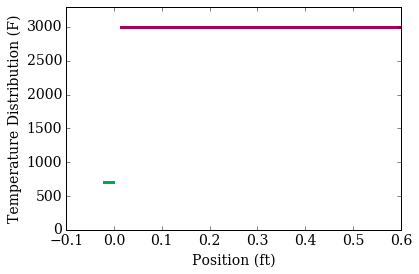

In [4]:
## Plot inital temperature Distribution
pyplot.plot(xMelt,  T0[:nXMelt], color='#AA0055', ls='-', lw=3)
pyplot.plot(xPlate, T0[nXMelt:], color='#00AA55', ls='-', lw=3)
pyplot.ylabel('Temperature Distribution (F)')
pyplot.xlabel('Position (ft)')
pyplot.ylim(0, 1.1 * T0Melt);

Let's now proceed with writting a function to return the internal heat generation as a fuction of time as we defined above.

In [5]:
def get_power(t, tau, P):
    """ Calculates the power density for a given time for use in the heat conduction equation
        Assumes an linear - exponential decay law which goes to zero after 5 time constants 
    
    Parameters:
    ----------
    t    : float
           transient time
    tau  : float
           time constant for use in the exponential decay equation
    P    : float
           initial power
        
    Returns:
    -------
    power : float
            power density
    """
    
    return max(0, P * (numpy.exp(- t / tau) - t / (5 * tau) * numpy.exp(-5)))

Now let's plot the transient power density and verify that it is what we wanted!

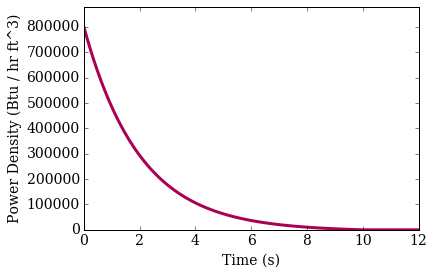

In [6]:
## Calculate Power distrobution
t = numpy.linspace(0, 6 * qGentau, 100)
y = numpy.zeros_like(t)
for n in range(len(t)):
    y[n] = get_power(t[n], qGentau, qVolGen)

## Plot transient Power over time
pyplot.plot(t, y, color='#AA0055', ls='-', lw=3)
pyplot.ylabel('Power Density (Btu / hr ft^3)')
pyplot.xlabel('Time (s)')
pyplot.ylim(0, 1.1*qVolGen);

##### _Boundary Condition and Non-Dimentional Parameters_

We now need to define a set of functions for returning the Bi numbers and their derivatives for the upper surface radiation and the lower surface convection.  Additionally, we neef to define a function to return the Fo number.

Lets start with the upper radiative boundary.

In [7]:
def get_BiRad(Ts, Tinf, dx, k, coeff):
    """ Calculates the Bi number and the derivative of the Bi number for radiation heat transfer 
    
    Parameters:
    ----------
    Ts   : float
           surface temperature
    Tinf : float
           temperature radiating to
    dx   : float
           spacial discritization
    k    : float
           thermal conductance
    coeff : float
            leading coefficiant for stephan-boltzman radiation law
        
    Returns:
    -------
    Bi  : float
          Biot number
    Bip : float
          Derivative of Bi number
    """
    
    sigma = 0.1714 * 10**-8
    Tref  = 459.67
    
    Ts = Ts + Tref
    Tinf = Tinf + Tref
    
    h = coeff * sigma * (Ts + Tinf) * (Ts**2 + Tinf**2) 
    hp = coeff * sigma * ((Ts**2 + Tinf**2) + 2 * Ts * (Ts + Tinf))
    
    return h * dx / k, hp * dx / k

The lower convective boundary is similar but slightly more complex as we first need to calculate the Ra number and its deriviative prior to calculating the Bi number and its derivative.

In [8]:
def get_BiConv(Ts, Tinf, dx, alpha, beta, nu, L):
    """ Calculates the Bi number and the derivative of the Bi number for convective heat transfer 
        Assumes free confection from a horizontal heated plate
    
    Parameters:
    ----------
    Ts   : float
           surface temperature
    Tinf : float
           temperature radiating to
    dx   : float
           spacial discritization
    alpha : float
            thermal conductance / rho Cp
    beta  : float
            volume expansion coefficient
    nu    : float
            kinematic viscosity
        
    Returns:
    -------
    Bi  : float
          Biot number
    Bip : float
          Derivative of Bi number
    """  
    
    g = 32.2
    Tref = 459.67
    Ts = Ts + Tref
    Tinf = Tinf + Tref
    
    Coeff = 0.27
    n = 1/4
    
    if Ts > Tinf:
        Ra  = (g * beta * (Ts - Tinf) * L**3) / (nu * alpha)
        Rap = (g * beta * L**3) / (nu * alpha) 
    
        h  = 1/L * Coeff * Ra**n
        hp = 1/L * Coeff * n * Ra**(n-1) * Rap
    
    else:
        h = 0
        hp = 0
     
    return h * dx, hp * dx

The Fo number is as one might expect.

In [9]:
def get_FoNumb(alpha, dt, dx):
    """ Calculates the Fo number for use in the heat transfer equation 
    
    Parameters:
    ----------
    alpha : float
            thermal conductance / rho Cp
    dt   : float
           time discritization
    dx   : float
           spacial discritization
        
    Returns:
    -------
    Fo  : float
          Fourier number
    """
    
    return alpha * dt / dx**2

###### _Convergence and the Dynamic Timestep size_

As you will see later, we will use a while loop to iterate on the Newton Raphon root search and will have need for a function which determines if the solution is sufficiently converged.  Whole books might be written (A friend said I should check the library ... but I forgot what that was) methods of determining convergence criteria and the selection of optimal timestep sizes.  However, for simplicity the determination of convergence will be given by the following relation:

$$ max \left( \frac{abs \left( \underline{T}_{j+1} - \underline{T}_{j} \right)}{\underline{T}_{j+1}} \right)< Error$$

Given that the initial condition for this problem is a highly non-equilibrium state and that the forcing function (volumetric generation) varies significantly over time, it is prudent to not restrict ourselves to a single choice of timestep size.  To do so, would either result in poor accuracy (i.e., large timestep) at the begining of the problem when the transient processes are very dynamic or poor computational efficiency when a quasi-steady state is reached later in the problem. Implementing a variable timestep size in our solution allows us to have our cake and eat it too! 

Again, here for simplicity, the specific implementation of the dynamic timestep will be as follows: (1) set a initial & maximum timestep allowed, (2) if convergence is not reached within a set number of attempts for a particular time in the transient reduce the timestep by a factor of 2, and finally, (3) if a sufficient number of timesteps have been completed successfully without reducing timestep size, increase timestep size by a factor of 2.  This essentially allows the timestep to flow at an "optimal" size for the accuracy desired recognizing the need for a damponing effect to avoid rapid oscillation of timestep size.

The code for timestep size is integrated into the transient evolution code shown below.  The following defines the convergence checking function:

In [10]:
def isConverge(Tnew, Told, err):
    """ Function for ascertaining convergence with a given error
        Finds the maximum element wise magnitude of relative error and compares this
        to an acceptable error
    
    Parameters:
    ----------
    Tnew : array of floats (1D)
           new temperature
    Told : array of floats (1D)
           old temperature    
    err  : float
           acceptable error
           
    Returns:
    -------
    conv : boolean
           returns true or false for convergence status           
    """
    return max(abs((Tnew - Told) / Tnew)) < err

##### _Coding the system of equations into matricies and solving the system_

Now lets write code we will need to solve the non-linear system of equations written above at every timestep to find the solution in time. 

First lets write a function to return the coefficent matrix $\underline{\underline{A}}$

In [11]:
def gen_CoeffMatrix(N1, N2, dx1, dx2, k1, k2, Fo1, Fo2, Bi1, Bi2):
    """ Generate implicit matrix for 1D heat equation with Neumann in top and bottom
        Applies to a two region problem (upper region is internally heated)
    
    Parameters:
    ----------
    N1   : int
           number of discretization points in region 1
    N2   : int
           number of discretization points in region 2
    dx1  : float
           spacial discritization in region 1
    dx2  : float
           spacial discritization in region 2
    k1   : float
           thermal conductance in region 1
    k2   : float
           thermal conductance in region 2
    Fo1  : float
           Fourier number in region 1
    Fo2  : float
           Fourier number in region 2
    Bi1  : float
           Biot number in region 1
    Bi2  : float
           Biot number in region 2        
           
    Returns:
    -------
    A : array of floats (2D)
        Matrix of implicit 1D heat equation
    """
    # Setup the diagonal
    d = numpy.diag(numpy.r_[
             1 + 2 * Fo1 * (1 + Bi1),         # Neumann BC Top
            (1 + 2 * Fo1) * numpy.ones(N1 - 2),  # Internal Top
             1 + Fo1 * (1 + k2/k1 * dx1/dx2), # Interface Top
             1 + Fo2 * (1 + k1/k2 * dx2/dx1), # Interface Bottom
            (1 + 2 * Fo2) * numpy.ones(N2 - 2),  # Internal Bottom
             1 + 2 * Fo2 * (1 + Bi2)          # Neumann BC Bottom
    ], 0)
    
    # Setup upper diagonal
    ud = numpy.diag(numpy.r_[
             - 2 * Fo1,               # Neumann BC Top
             - Fo1 * numpy.ones(N1 - 2), # Internal Top
             - Fo1 * k2/k1 * dx1/dx2, # Interface Top
             - Fo2,                   # Interface Bottom
             - Fo2 * numpy.ones(N2 - 2)  # Internal Bottom
    ], 1)
    
    # Setup lower diagonal
    ld = numpy.diag(numpy.r_[
             - Fo1 * numpy.ones(N1 - 2), # Internal Top
             - Fo1,                   # Interface Top
             - Fo2 * k1/k2 * dx2/dx1, # Interface Bottom
             - Fo2 * numpy.ones(N2 - 2), # Internal Bottom
             - 2 * Fo2                # Neumann BC Bottom
    ], -1)
    
    A = d + ud + ld
    
    return A

Second lets write a function to return the in-homogenious matrix $\underline{B}$

In [12]:
def gen_InHomVector(N1, N2, dt, T, Fo1, Fo2, Bi1, Bi2, Tb1, Tb2, rhoCp1, rhoCp2, qdot1, qdot2):
    """ Generate right hand side for 1D heat equation with Neumann in top and bottom
        Applies to a two region problem (upper region is internally heated)
    
    Parameters:
    ----------
    N1   : int
           number of discretization points in region 1
    N2   : int
           number of discretization points in region 2
    dt   : float
           temporal discritization
    Fo1  : float
           Fourier number in region 1
    Fo2  : float
           Fourier number in region 2
    Bi1  : float
           Biot number in region 1
    Bi2  : float
           Biot number in region 2
    Tb1  : float
           Boundary temperature in region 1
    Tb2  : float
           Boundary temperature in region 2
    rhoCp1  : float
           specific heat capacity in region 1
    rhoCp2  : float
           specific heat capacity in region 2
    qdot1  : float
           internal heat generation in region 1
    qdot2  : float
           internal heat generation in region 2 
           
    Returns:
    -------
    B : array of floats (1D)
        RHS Matrix of implicit 1D heat equation
    """
    
    # Setup Vector Component from previous 
    # Timestep Temperature
    bTemp = T.copy()
    
    # Setup Vector Component from Neumann BC 
    bNeumann = numpy.zeros_like(T)
    bNeumann[0] = 2 * Fo1 * Bi1 * Tb1
    bNeumann[-1] = 2 * Fo2 * Bi2 * Tb2
    
    # Setup Vector Component from Internal Generation
    bInternal = numpy.r_[
        (dt / rhoCp1) * qdot1 * numpy.ones(N1),
        (dt / rhoCp2) * qdot2 * numpy.ones(N2)
    ]
    
    return bTemp + bNeumann + bInternal

Third, lets write a function to return the Jacobian matrix $\underline{\underline{J}}$

In [13]:
def gen_JacobMatrix(A, T, Fo1, Fo2, Bip1, Bip2, Tb1, Tb2):
    """ Generate Jacobian Matrix for 1D heat equation with Neumann in top and bottom
        Applies to a two region problem (upper region is internally heated)
    
    Parameters:
    ----------
    A    : array of floats (2D)
           Matrix of implicit 1D heat equation
    T    : array of floats (1D)
           Temperature of implicit 1D heat equation
    Fo1  : float
           Fourier number in region 1
    Fo2  : float
           Fourier number in region 2
    Bip1  : float
           Biot number derivative in region 1
    Bip2  : float
           Biot number derivative in region 2
    Tb1  : float
           Boundary temperature in region 1
    Tb2  : float
           Boundary temperature in region 2
           
    Returns:
    -------
    J : array of floats (2D)
        Jacobian Matrix of implicit 1D heat equation
    """
    
    J = A.copy()
    
    # Setup upper Neumann BC (Derivative of A)
    J[0] = J[0] + (2 * Fo1 * Bip1) * (T[0] - Tb1)

    # Setup lower Neumann BC (Derivative of B)
    J[-1] = J[-1] + (2 * Fo2 * Bip2) * (T[-1] - Tb2)
   
    return J

Finally, we will write a nested while loop structure to step through each timestep and iteration within each timestep.  The code below can and should be translated into a function. However, due to the large number of inputs needed for such a function and for the ease of this lesson, we will forego this step.  

You should grab a piece of paper and a pencil (I know I said it again) and flow chart what this code should look like. A few new topics were introduced in this lesson; in particular, an inner iteration loop and a dynamic time step.  You should know how this should look before you ever start codeing a single line!

In [14]:
#### Apply Newton Raphson Scheme ####

## Initial non-dimentional quantities
FoMelt = get_FoNumb(alphaM, dt, dxMelt)
FoPlate = get_FoNumb(alphaP, dt, dxPlate)
BiMelt, BiMeltP = get_BiRad(T0[0], TinfR, dxMelt, kMelt, vFeps)
BiPlate, BiPlateP = get_BiConv(T0[-1], TinfC, dxPlate, alphaP, betaH2O, nuH2O, LChar)

## Initial Matricies
A = gen_CoeffMatrix(nXMelt, nXPlate, dxMelt, dxPlate, kMelt, kPlate, FoMelt, FoPlate, BiMelt, BiPlate)
B = gen_InHomVector(nXMelt, nXPlate, dt, T0, FoMelt, FoPlate, BiMelt, BiPlate, 
                    TinfR, TinfC, rhoCpMelt, rhoCpPlate, get_power(time, qGentau, qVolGen), 0)

## Initialize Temperature and zero dead band for increasing timestep size
T = T0.copy()
nIterDband = 0

## While loop for every timestep
while time <= tMax:
    
    ## Initialize convergence state, 
    ## initial temp for iteration, and zero Newton iterations
    convIter = False 
    nIter = 0
    Told = T.copy()
    
    ## While loop for Newton iterations
    while not convIter:
        
        ## Calculate non-dimentional quantities
        FoMelt = get_FoNumb(alphaM, dt, dxMelt)
        FoPlate = get_FoNumb(alphaP, dt, dxPlate)
        BiMelt, BiMeltP = get_BiRad(Told[0], TinfR, dxMelt, kMelt, vFeps)
        BiPlate, BiPlateP = get_BiConv(Told[-1], TinfC, dxPlate, alphaP, betaH2O, nuH2O, LChar)

        ## Calculate Maticies
        A = gen_CoeffMatrix(nXMelt, nXPlate, dxMelt, dxPlate, kMelt, kPlate, FoMelt, FoPlate, BiMelt, BiPlate)
        B = gen_InHomVector(nXMelt, nXPlate, dt, Told, FoMelt, FoPlate, BiMelt, BiPlate, 
                    TinfR, TinfC, rhoCpMelt, rhoCpPlate, get_power(time, qGentau, qVolGen), 0)
        J = gen_JacobMatrix(A, Told, FoMelt, FoPlate, BiMeltP, BiPlateP, TinfR, TinfC)
    
        ## Guess new temperature for timestep
        Tguess = Told + numpy.dot(-numpy.linalg.inv(J), numpy.dot(A, Told) - B)
    
        ## Test for convergence; if converged set temp & increment Dband count
        if isConverge(Tguess, Told, nErrMax):
            convIter = True
            T = Tguess.copy()
            nIterDband = nIterDband + 1
        
        ## Test for too many attempts; if failed reset temp, interation count, 
        ## decrease timestep size, & reset Dband count            
        elif nIter >= nIterMax:
            nIter = 0
            dt = dt / 2
            nIterDband = 0
            Told = T.copy()

        ## If not converged and still attempting; set new temp 
        ## & increment iteration count
        else:
            Told = Tguess.copy()
            nIter = nIter + 1

    ## End While not convIter
    
    ## If sufficient time elapsed since last output; 
    ## save snapshot of output variables
    if time + dt >= tPrint[-1] + tPntRes:
        tPrint = numpy.r_[tPrint, time + dt]
        TPrint = numpy.c_[TPrint, T]
        dtPrint = numpy.r_[dtPrint, dt]
 
    ## If sufficient successful timesteps @ current timestep size;
    ## increase timestep size, reset Dband counter, and clip dt to dtMax 
    ## save snapshot of output variables
    if nIterDband >= NdtDband:
        nIterDband = 0
        dt = dt * 2.0
    if dt > dtMax:
        dt = dtMax
    
    ## Increment time
    time = time + dt

## End While time <= tMax   

Looks Great - Now did it work (I am always surprised when it actually works)?

Plot the solution!  _(and I think I like the spectral colormap more than the viridis)_

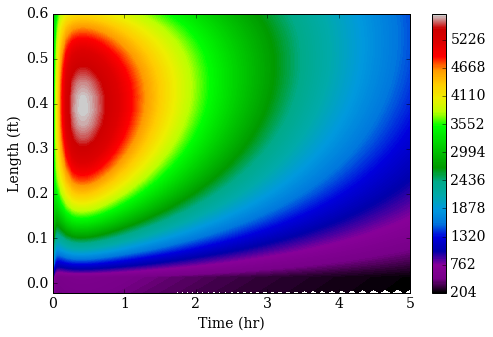

In [15]:
y = numpy.r_[xMelt,xPlate]
x = tPrint
mx, my = numpy.meshgrid(x,y)

pyplot.figure(figsize=(8,5))
pyplot.contourf(mx, my, TPrint, 10**3, cmap=cm.spectral)
pyplot.grid
pyplot.ylabel('Length (ft)')
pyplot.xlabel('Time (hr)')
pyplot.colorbar();

Wow, the solution is pretty dynamic in the first ~6 minutes.  Let's plot just the first 6 minutes!

Also note the growing oscilations in tempreature at the lower boundary ... why do you think this is.  
_Hint: look at the derivation of the difference equation for the lower boundary, what is the order of all of the terms?_

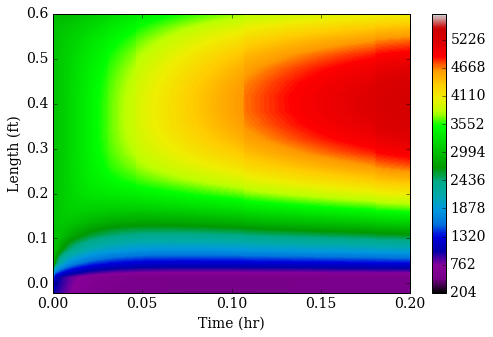

In [16]:
y = numpy.r_[xMelt,xPlate]
x = tPrint
mx, my = numpy.meshgrid(x,y)

pyplot.figure(figsize=(8,5))
pyplot.contourf(mx, my, TPrint, 10**3, cmap=cm.spectral)
pyplot.grid
pyplot.ylabel('Length (ft)')
pyplot.xlabel('Time (hr)')
pyplot.xlim(0,0.20)
pyplot.colorbar();

Lets now focus on the upper, lower, and midplane temperature distrobutions for both the Melt and the Plate!

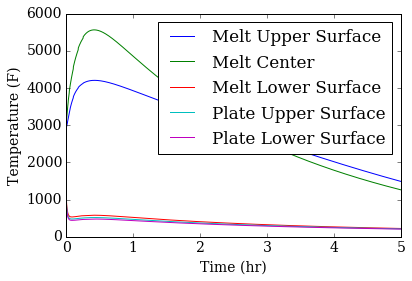

In [17]:
pyplot.plot(tPrint, TPrint[0], ls='-', lw=1)
pyplot.plot(tPrint, TPrint[int((nXMelt-1)/2)], ls='-', lw=1)
pyplot.plot(tPrint, TPrint[nXMelt-1], ls='-', lw=1)
pyplot.plot(tPrint, TPrint[nXMelt], ls='-', lw=1)
pyplot.plot(tPrint, TPrint[-1], ls='-', lw=1)
pyplot.xlim(0,5)
pyplot.legend(['Melt Upper Surface','Melt Center','Melt Lower Surface',\
           'Plate Upper Surface','Plate Lower Surface'])
pyplot.ylabel('Temperature (F)')
pyplot.xlabel('Time (hr)');

Now plot how the timestep size varied over the simulation and lets see if the trouble we went to was worth it!

Plot the timestep size!

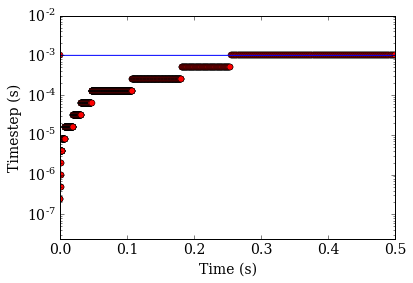

In [18]:
pyplot.semilogy(tPrint, dtPrint, 'ro', tPrint, numpy.ones(len(dtPrint)) * dtMax, 'b-')
pyplot.ylabel('Timestep (s)')
pyplot.xlabel('Time (s)');
pyplot.xlim(0, 0.5)
pyplot.ylim(min(dtPrint)/10, 10 * dtMax);

##### _Is it Surprising ... It Works!!_

The figure above is exactly as we might have expected. We were able to use a very small timestep size in the begining when it was needed and a substatially larger timestep size as the solution approaches a more equilibrium state.  This method of timestep selection is self correcting to an extent.  This allowance for increasing the timestep size, subject to accuracy constrants, is playing to the stregths of the implicit scheme chosen for this solution.

#####  _With great power comes great responsibility_

The Implicit method coupled with the dynamic timestep allows you to use very large initial and maximum timestep sizes.  This is a good thing!  However, you should be careful about the accuracy of the solution.  If you recal from the derivation of the difference equations for the exterier and interface nodes, a first order accurate differece approximation was used in some of these terms.  That means, for all the fancy code jiu-jitsu we employed with the variable timestep and the iterative Newton Raphson scheme, **the Error still grows linearly with increasing timestep size!!! So be Careful!!**

##### Dig deeper

Do you think you could allow for even larger timestep sizes while retaining sufficently accurate results?  why not replace the first order derivative approximations in the interface and exterier nodes in the equations above with second order accurate approximations.

Is this sufficient ... No.  

The Newton Raphson scheme is essentially an Euler method, that means its first order in time.  Why not also replace the Newton Raphson iteration with a second order accurate method (["Runge-Kutta"](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods), or ["Crank-Nicolson"](https://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method))

And finally, experiment with the input assumptions such as initial temperature, lengths, material properties, and power density.

_if you are really adventurious ... convert the notebook from Imperial units to SI units :) _

##### _References_

1. Home, D., & Chai, M. (2015). Determination of In-Vessel Retention Under Molten Corium Pool Attack. International Topical Conference on Nuclear Reactor Thermal Hydraulics. Chicago.

2. Incropera, DeWitt, Bergman, Lavine. _Fundamentals of Heat and Mass Transfer_, Whiley 2007, 6th edition.  (see sections 4.4, 5.10, & 9.6)

3. L. Barba, I. hawke, C. Jerez. _Practical Numerical Methods with Python_, The George Washington University, School of Mechanical and Aerospace Engineering, Fall 2015 ["OpenEdX"](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/99f230e1104b46c1857417614de7e3bd/) ["GitHub"](https://github.com/numerical-mooc/numerical-mooc)